<a href="https://colab.research.google.com/github/xxihe/sandbox2019/blob/master/plot_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns
sns.set(style="ticks")

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%%bash
wget https://nekrut.github.io/BMMB554/tnseq_untreated.txt.gz
wget https://nekrut.github.io/BMMB554/ta_gc.txt


--2019-02-04 20:17:29--  https://nekrut.github.io/BMMB554/tnseq_untreated.txt.gz
Resolving nekrut.github.io (nekrut.github.io)... 185.199.109.153, 185.199.108.153, 185.199.110.153, ...
Connecting to nekrut.github.io (nekrut.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2012967 (1.9M) [application/gzip]
Saving to: ‘tnseq_untreated.txt.gz.2’

     0K .......... .......... .......... .......... ..........  2% 1.20M 2s
    50K .......... .......... .......... .......... ..........  5% 1.75M 1s
   100K .......... .......... .......... .......... ..........  7%  165M 1s
   150K .......... .......... .......... .......... .......... 10%  163M 1s
   200K .......... .......... .......... .......... .......... 12% 2.96M 1s
   250K .......... .......... .......... .......... .......... 15% 2.62M 1s
   300K .......... .......... .......... .......... .......... 17% 2.87M 1s
   350K .......... .......... .......... .......... .......... 20%  16

In [0]:
data_file = 'tnseq_untreated.txt.gz'

In [0]:
# Process tnseq_untreated.txt.gz to correctly parse gene names

import os
f = open('data.txt','w')

with os.popen('gunzip -c {}'.format(data_file)) as stream:
  for line in stream:
    if line.split( '\t' )[7].startswith( '.' ):
      f.write( '{}\t{}\n'.format( '\t'.join( line.split( '\t' )[:7] ) , 'intergenic'  ) )
    elif line.split( '\t' )[7].startswith( 'ID' ):
      f.write( '{}\t{}\n'.format( '\t'.join( line.split( '\t' )[:7] ) , line.split( '\t' )[7].split(';')[0][3:] ) )
f.close()


In [0]:
tnseq = pd.read_table('data.txt', header=None, names=['pos','blunt','cap','dual','erm','pen','tuf','gene'])

gc = pd.read_table('ta_gc.txt', header=None, names=['pos','gc'])

In [0]:
df = sns.load_dataset("anscombe")

In [8]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [9]:
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

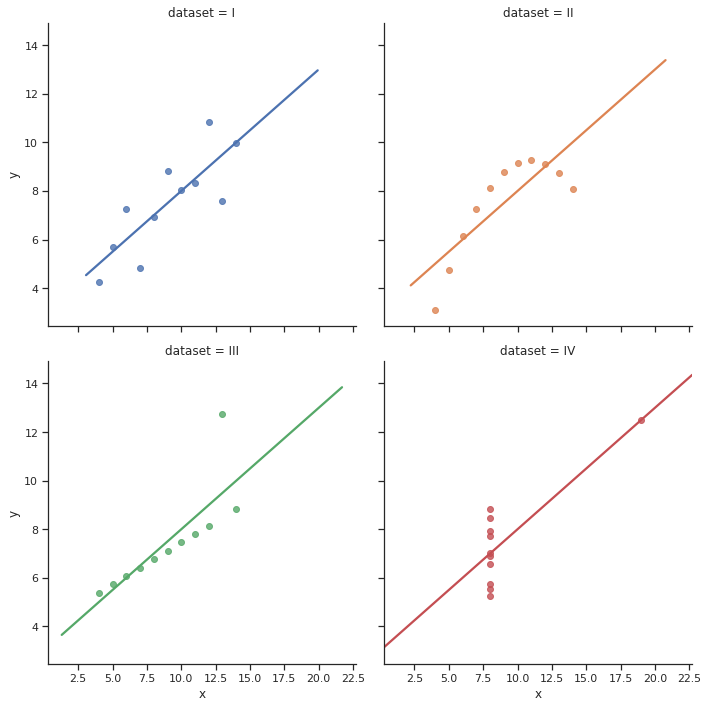

In [10]:
sns.lmplot(x='x',y='y',col='dataset',hue='dataset',data=df,col_wrap=2,ci=None)

# Back to tnseq data


In [11]:
tnseq.head()

,pos,blunt,cap,dual,erm,pen,tuf,gene
0,2400002,0.0,0.0,1.0,0.0,0.0,1.0,intergenic
1,2400004,1.0,0.0,5.0,0.0,0.0,1.0,intergenic
2,2400006,1.0,0.0,5.0,1.0,0.0,1.0,intergenic
3,2400009,2.0,2.0,8.0,1.0,0.0,0.0,intergenic
4,2400029,6.0,1.0,0.0,1.0,0.0,1.0,intergenic


In [12]:
gc.head()

,pos,gc
0,4,0.339286
1,10,0.354839
2,16,0.367647
3,42,0.372340
4,79,0.303922


In [0]:
tn_gc = tnseq.merge(gc,left_on='pos',right_on='pos',how='left')

In [14]:
tn_gc.head()

,pos,blunt,cap,dual,erm,pen,tuf,gene,gc
0,2400002,0.0,0.0,1.0,0.0,0.0,1.0,intergenic,0.225490
1,2400004,1.0,0.0,5.0,0.0,0.0,1.0,intergenic,0.225490
2,2400006,1.0,0.0,5.0,1.0,0.0,1.0,intergenic,0.215686
3,2400009,2.0,2.0,8.0,1.0,0.0,0.0,intergenic,0.225490
4,2400029,6.0,1.0,0.0,1.0,0.0,1.0,intergenic,0.215686


In [0]:
tdf=pd.melt(tn_gc,id_vars=['pos','gc','gene'],value_vars=['blunt','cap','dual','erm','pen','tuf'],var_name='construct',value_name='count')

In [16]:
tdf.head()

,pos,gc,gene,construct,count
0,2400002,0.225490,intergenic,blunt,0.0
1,2400004,0.225490,intergenic,blunt,1.0
2,2400006,0.215686,intergenic,blunt,1.0
3,2400009,0.225490,intergenic,blunt,2.0
4,2400029,0.215686,intergenic,blunt,6.0


In [17]:
tdf[tdf['gene']!='intergenic'].head()

,pos,gc,gene,construct,count
26,2400206,0.303922,gene2461,blunt,2.0
27,2400211,0.323529,gene2461,blunt,0.0
28,2400226,0.294118,gene2461,blunt,0.0
29,2400231,0.303922,gene2461,blunt,0.0
30,2400243,0.294118,gene2461,blunt,3.0


In [0]:
tdf.loc[tdf['gene']=='intergenic','genic']='no'

In [0]:
tdf.loc[tdf['gene']!='intergenic','genic']='yes'

In [20]:
tdf[tdf['gene']!='intergenic'].head()

,pos,gc,gene,construct,count,genic
26,2400206,0.303922,gene2461,blunt,2.0,yes
27,2400211,0.323529,gene2461,blunt,0.0,yes
28,2400226,0.294118,gene2461,blunt,0.0,yes
29,2400231,0.303922,gene2461,blunt,0.0,yes
30,2400243,0.294118,gene2461,blunt,3.0,yes


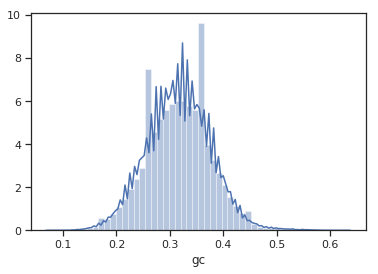

In [21]:
sns.distplot(tdf['gc'])

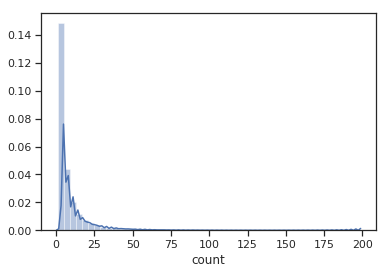

In [22]:
sns.distplot(tdf['count'][(tdf['count']>0) & (tdf['count']<200)])

[None]

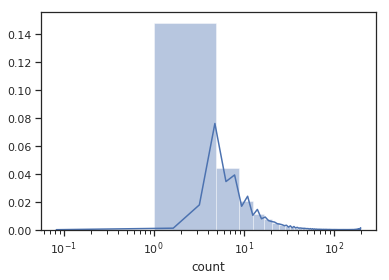

In [23]:
g = sns.distplot(tdf['count'][(tdf['count']>0) & (tdf['count']<200)])
g.set(xscale="log")

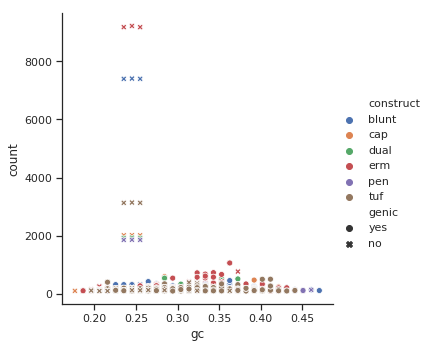

In [25]:
sns.relplot(x='gc',y='count',data=tdf[tdf['count']>100],hue='construct',style='genic')

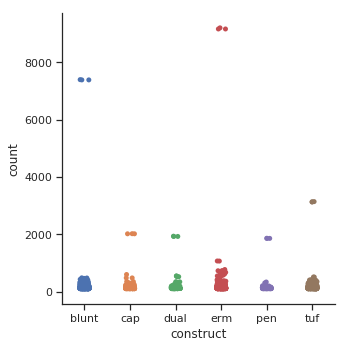

In [26]:
sns.catplot(x='construct',y='count',data=tdf[tdf['count']>100])

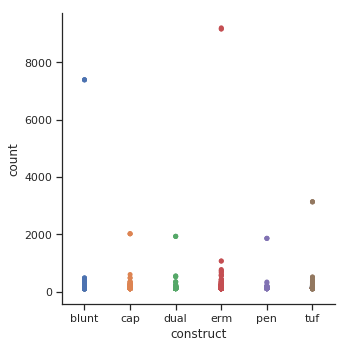

In [27]:
sns.catplot(x='construct',y='count',data=tdf[tdf['count']>100],jitter=False)

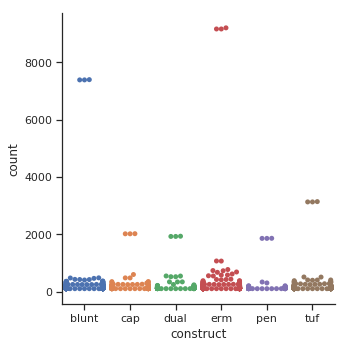

In [28]:
sns.catplot(x='construct',y='count',data=tdf[tdf['count']>100],kind='swarm')

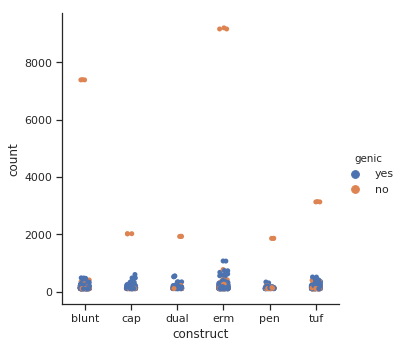

In [29]:
sns.catplot(x='construct',y='count',data=tdf[tdf['count']>100],hue='genic')

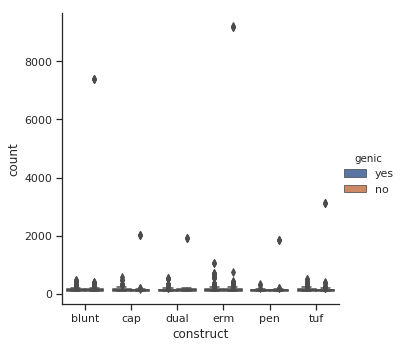

In [33]:
sns.catplot(x='construct',y='count',data=tdf[tdf['count']>100],hue='genic',kind='box')

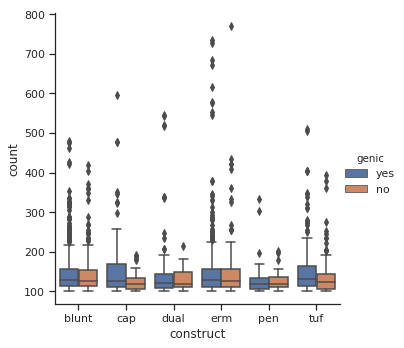

In [34]:
sns.catplot(x='construct',y='count',data=tdf[(tdf['count']>100) & (tdf['count']<1000)],hue='genic', kind='box')

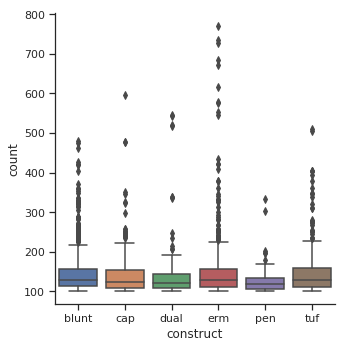

In [32]:
sns.catplot(x='construct',y='count',data=tdf[(tdf['count']>100) & (tdf['count']<1000)],kind='box')

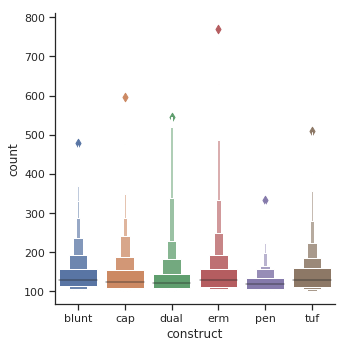

In [35]:
sns.catplot(x='construct',y='count',data=tdf[(tdf['count']>100) & (tdf['count']<1000)],kind='boxen')

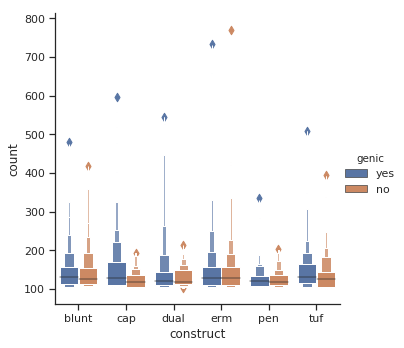

In [37]:
sns.catplot(x='construct',y='count',data= tdf[(tdf['count']>100) & (tdf['count']<1000)],kind='boxen',hue='genic')

In [0]:
small_df = tdf[(tdf['count']>100) & (tdf['count']<1000)]

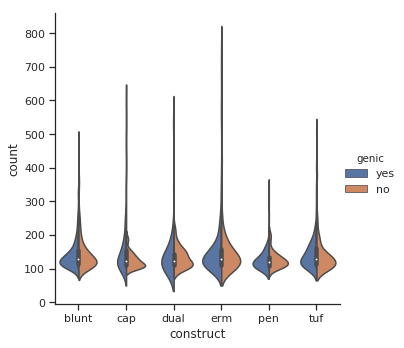

In [42]:
sns.catplot(x='construct',y='count',data= small_df,kind='violin',hue='genic',split=True)

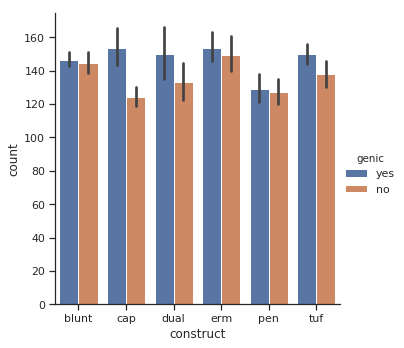

In [43]:
sns.catplot(x='construct', y='count',hue='genic',kind='bar',data=small_df)